In [1]:
import pandas as pd

In [109]:
weather = pd.read_csv("local_weather.csv", index_col="DATE")
weather.head()

,STATION,NAME,ACMH,ACSH,AWND,DAPR,FMTM,FRGT,MDPR,PGTM,...,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT09,WT16,WT18
DATE,,,,,,,,,,,,,,,,,,,,,
1960-01-01,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-02,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1960-01-03,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-04,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-05,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [110]:
weather.isna().sum()/weather.shape[0]

STATION    0.000000
NAME       0.000000
ACMH       0.653360
ACSH       0.653360
AWND       0.522451
DAPR       0.999525
FMTM       0.870099
FRGT       0.999881
MDPR       0.999525
PGTM       0.495106
PRCP       0.016668
SNOW       0.324990
SNWD       0.317634
TAVG       0.879174
TMAX       0.000534
TMIN       0.000593
TSUN       0.931728
WDF1       0.653360
WDF2       0.522392
WDF5       0.527552
WDFG       0.746901
WSF1       0.653360
WSF2       0.522332
WSF5       0.527552
WSFG       0.746901
WT01       0.779939
WT02       0.980248
WT03       0.992941
WT04       0.999763
WT05       0.998339
WT07       0.999881
WT08       0.810368
WT09       0.999881
WT16       0.884038
WT18       0.999822
dtype: float64

In [111]:
core_weather = weather[["PRCP","SNOW","SNWD","TMAX","TMIN"]]

In [112]:
core_weather['SNOW'].value_counts()
core_weather["SNWD"].value_counts()
del core_weather["SNOW"]
del core_weather["SNWD"]

In [113]:
core_weather["PRCP"] = core_weather['PRCP'].fillna(0)

C:\Users\SANTOSO TOGATOROP\AppData\Local\Temp\ipykernel_13320\442091685.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  core_weather["PRCP"] = core_weather['PRCP'].fillna(0)


In [114]:
core_weather[core_weather["TMIN"].isna()]

,PRCP,TMAX,TMIN
DATE,,,
2004-11-20,0.0,NaN,NaN
2011-12-21,0.0,61.0,NaN
2011-12-22,0.0,62.0,NaN
2011-12-23,0.0,56.0,NaN
2011-12-24,0.0,55.0,NaN
2011-12-25,0.0,54.0,NaN
2013-06-16,0.0,NaN,NaN
2020-08-29,0.0,NaN,NaN
2020-09-08,0.0,NaN,NaN


In [115]:
core_weather = core_weather.fillna(method='ffill')

C:\Users\SANTOSO TOGATOROP\AppData\Local\Temp\ipykernel_13320\1266411444.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  core_weather = core_weather.fillna(method='ffill')


In [116]:
core_weather.index = pd.to_datetime(core_weather.index)

<Axes: xlabel='DATE'>

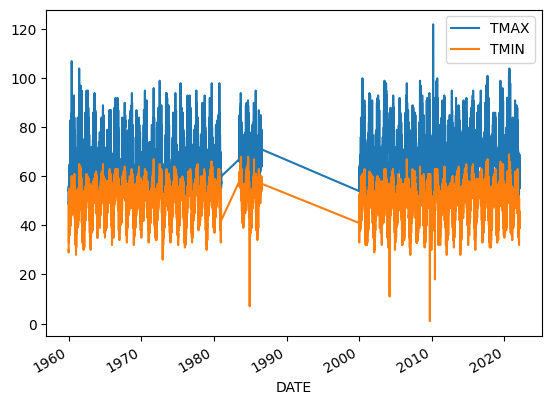

In [117]:
core_weather[["TMAX","TMIN"]].plot()

In [118]:
core_weather.index.year.value_counts()

DATE
1960    366
1972    366
2016    366
2008    366
2004    366
2020    366
1980    366
1976    366
1984    366
1964    366
1968    366
2011    365
2005    365
2006    365
2007    365
1963    365
2009    365
2010    365
1969    365
2003    365
2013    365
2014    365
2015    365
1962    365
2017    365
2018    365
2012    365
2002    365
1970    365
1978    365
1971    365
1973    365
1974    365
1975    365
1967    365
1977    365
1979    365
2001    365
1966    365
1965    365
1985    365
1961    365
2000    365
2019    365
2021    364
1986    212
1983    184
2022     28
Name: count, dtype: int64

In [119]:
core_weather.groupby(core_weather.index.year)["PRCP"].sum()

DATE
1960    14.01
1961    13.87
1962    22.47
1963    19.11
1964    16.83
1965    16.32
1966    13.11
1967    23.98
1968    17.19
1969    25.70
1970    25.31
1971    10.61
1972    16.27
1973    29.37
1974    16.87
1975    17.54
1976     8.64
1977    11.70
1978    22.57
1979    23.79
1980    13.58
1983     7.13
1984    16.03
1985     8.50
1986     0.00
2000    21.09
2001    22.84
2002    19.12
2003    11.37
2004    12.97
2005    27.37
2006    22.79
2007    12.79
2008    13.86
2009    14.57
2010    22.67
2011    16.06
2012    22.93
2013     4.89
2014    19.62
2015     8.58
2016    19.77
2017    23.34
2018    16.82
2019    20.00
2020     6.42
2021    20.82
2022     0.25
Name: PRCP, dtype: float64

In [120]:
core_weather["target"] = core_weather.shift(-1)['TMAX']

In [121]:
core_weather.tail()

,PRCP,TMAX,TMIN,target
DATE,,,,
2022-01-24,0.0,60.0,39.0,57.0
2022-01-25,0.0,57.0,43.0,57.0
2022-01-26,0.0,57.0,41.0,67.0
2022-01-27,0.0,67.0,39.0,64.0
2022-01-28,0.0,64.0,39.0,NaN


In [122]:
core_weather = core_weather.iloc[:-1,:]

### MODEL

In [123]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error

In [124]:
def prediction(predictors, core_weather):
    train = core_weather.loc[:"2020-12-31",:]
    test = core_weather.loc["2021-01-01":,:]
    X_train = train[predictors]
    Y_train = train['target']
    X_test = test[predictors]
    Y_test = test['target']

    model = Ridge(alpha=0.1)
    model.fit(X_train, Y_train)
    accuracy = model.predict(X_test)
    error =  mean_absolute_error(Y_test,accuracy)

    combine = pd.concat([Y_test, pd.Series(accuracy, index=Y_test.index)], axis=1)
    combine.columns = ['actual','prediction']

    return error, combine

In [125]:
predictors = ['PRCP','TMAX','TMIN']
error, combine = prediction(predictors,core_weather)

In [129]:
core_weather['month_max'] = core_weather['TMAX'].rolling(30).mean()
core_weather = core_weather.iloc[30:,:]

C:\Users\SANTOSO TOGATOROP\AppData\Local\Temp\ipykernel_13320\2762848110.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  core_weather['month_max'] = core_weather['TMAX'].rolling(30).mean()


In [ ]:
core_weather['month_day_max'] = core_weather['month_max']/core_weather['TMAX']
core_weather['max_min'] = core_weather['TMAX']/core_weather['TMIN']
core_weather['monthly_avg'] = core_weather.groupby(core_weather.index.month)['TMAX'].transform(lambda x: x.expanding(1).mean())
core_weather['day_of_year_avg'] = core_weather.groupby(core_weather.index.day_of_year)['TMAX'].transform(lambda x: x.expanding(1).mean())

In [133]:
core_weather

,PRCP,TMAX,TMIN,target,month_max,month_day_max,max_min,monthly_avg,day_of_year_avg
DATE,,,,,,,,,
1960-04-30,0.00,62.0,51.0,66.0,65.866667,1.062366,1.215686,62.000000,62.000000
1960-05-01,0.00,66.0,47.0,59.0,65.766667,0.996465,1.404255,66.000000,66.000000
1960-05-02,0.00,59.0,51.0,59.0,65.133333,1.103955,1.156863,62.500000,59.000000
1960-05-03,0.17,59.0,49.0,65.0,64.400000,1.091525,1.204082,61.333333,59.000000
1960-05-04,0.00,65.0,49.0,68.0,63.800000,0.981538,1.326531,62.250000,65.000000
...,...,...,...,...,...,...,...,...,...
2022-01-23,0.00,60.0,41.0,60.0,56.900000,0.948333,1.463415,56.779972,57.130435
2022-01-24,0.00,60.0,39.0,57.0,57.066667,0.951111,1.538462,56.782241,57.239130
2022-01-25,0.00,57.0,43.0,57.0,57.200000,1.003509,1.325581,56.782394,57.347826


In [134]:
predictors = ['PRCP','TMAX','TMIN','month_max','month_day_max','max_min','monthly_avg','day_of_year_avg']
error,combine = prediction(predictors,core_weather)

In [135]:
error

np.float64(3.3177584104343816)